# Imports and Kernel

In [41]:
#imports, numpy pandas scipy, math, matplotlip
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import seaborn as sns

#Backup imports/installs
  #from sqlalchemy import create_engine
  #!pip install PyMySQL
  #import pymysql
  #import seaborn as sns
  #!pip uninstall -y pandas-profiling
  #!pip install pandas-profiling
  #import pandas_profiling
  #!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split


from google.colab import drive 
drive.mount('/content/gdrive')

rawData = pd.read_csv('gdrive/My Drive/DataAnalytics/C2/C2/CleanedRaw.csv', header=0)
rawData.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Index,CreditLimit,SEX,EDUCATION,MARRIAGE,AGE,SepRepay,AugRepay,JulRepay,JunRepay,...,JunBillAmt,MayBillAmt,AprBillAmt,SepPmt,AugPmt,JulPmt,JunPmt,MayPmt,AprPmt,Default_Status
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


# Upload Cleaned Data 

In [22]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Index           2397 non-null   int64 
 1   CreditLimit     2397 non-null   int64 
 2   SEX             2397 non-null   object
 3   EDUCATION       2397 non-null   object
 4   MARRIAGE        2397 non-null   int64 
 5   AGE             2397 non-null   int64 
 6   SepRepay        2397 non-null   int64 
 7   AugRepay        2397 non-null   int64 
 8   JulRepay        2397 non-null   int64 
 9   JunRepay        2397 non-null   int64 
 10  MayRepay        2397 non-null   int64 
 11  AprRepay        2397 non-null   int64 
 12  SepBillAmt      2397 non-null   int64 
 13  AugBillAmt      2397 non-null   int64 
 14  JulBillAmt      2397 non-null   int64 
 15  JunBillAmt      2397 non-null   int64 
 16  MayBillAmt      2397 non-null   int64 
 17  AprBillAmt      2397 non-null   int64 
 18  SepPmt  

In [37]:
df = rawData[['CreditLimit','SEX','EDUCATION','MARRIAGE','AGE','SepRepay','AugRepay','JulRepay','JunRepay','MayRepay','AprRepay','SepBillAmt','AugBillAmt','JulBillAmt','JunBillAmt','MayBillAmt','AprBillAmt','SepPmt','AugPmt','JulPmt','JunPmt','MayPmt','AprPmt','Default_Status']]
df_dum = pd.get_dummies(df)
#features
X = df_dum.iloc[:,0:4]
print('Summary of feature sample')
X.head()
#dependent variable
y = df_dum['CreditLimit']

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 123)

Summary of feature sample


In [43]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CreditLimit                 2397 non-null   int64
 1   MARRIAGE                    2397 non-null   int64
 2   AGE                         2397 non-null   int64
 3   SepRepay                    2397 non-null   int64
 4   AugRepay                    2397 non-null   int64
 5   JulRepay                    2397 non-null   int64
 6   JunRepay                    2397 non-null   int64
 7   MayRepay                    2397 non-null   int64
 8   AprRepay                    2397 non-null   int64
 9   SepBillAmt                  2397 non-null   int64
 10  AugBillAmt                  2397 non-null   int64
 11  JulBillAmt                  2397 non-null   int64
 12  JunBillAmt                  2397 non-null   int64
 13  MayBillAmt                  2397 non-null   int64
 14  AprBillA

In [26]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)
#Predictions
preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       10000       1.00      1.00      1.00        10
       20000       1.00      1.00      1.00        44
       30000       1.00      1.00      1.00        40
       40000       1.00      1.00      1.00         8
       50000       1.00      1.00      1.00       100
       60000       1.00      1.00      1.00        22
       70000       1.00      1.00      1.00        19
       80000       1.00      1.00      1.00        28
       90000       1.00      1.00      1.00        14
      100000       1.00      1.00      1.00        19
      110000       1.00      1.00      1.00        15
      120000       1.00      1.00      1.00        22
      130000       1.00      1.00      1.00        19
      140000       1.00      1.00      1.00        30
      150000       1.00      1.00      1.00        22
      160000       1.00      1.00      1.00        14
      170000       1.00      1.00      1.00        10
      180000       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pre-processing

In [39]:
#features
X = rawData.iloc[:,1:6]
print('Summary of feature sample')
X.head()

#dependent variable
y = rawData['CreditLimit']

#model = LinearRegression(parameters go here)

Summary of feature sample


In [28]:
#dependent variable
print(y)

0        20000
1       120000
2        90000
3        50000
4        50000
         ...  
2392     50000
2393     20000
2394    130000
2395    110000
2396    200000
Name: CreditLimit, Length: 2397, dtype: int64


In [29]:
model = LinearRegression(n_jobs=10)

In [30]:
print(cross_val_score(model, X, y, cv=3)) 

[nan nan nan]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 663, in fit
    X, y, accept_sparse=accept_sparse, y_numeric=True, multi_output=True
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/loc

In [31]:
algosClass = []

In [32]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [33]:
algosClass.append(('Linear Regression',LinearRegression()))

In [34]:
algosClass.append(('Support Vector Regression',SVR()))

In [ ]:
#regression
results = []
names = []

for name, model in algosClass:
  result = cross_val_score(model, X,y, cv=3, scoring='r2')
  names.append(name)
  results.append(result)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python

In [35]:
for i in range(len(names)):
    print(names[i],results[i].mean())

NameError: ignored

In [36]:
algo = choose your algorithm()

SyntaxError: ignored

In [ ]:
model = algo.fit(X_train,y_train)

NameError: ignored

In [ ]:
predictions = modelRF.predict(X_test)

In [ ]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [ ]:
predRsquared = r2_score(y_test,predictions)

In [ ]:
#Make Predictions
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

In [ ]:
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# At what dollar amount people are defaulting?

# Marital status or age have a correlation?

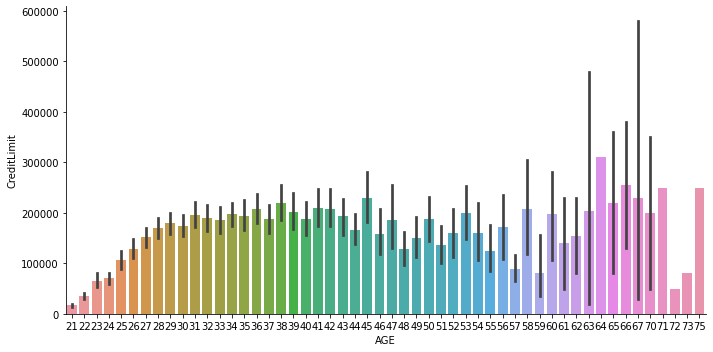

In [45]:
#factorplot of transactions amounts grouped by age range.
sns.catplot(x='AGE', y='CreditLimit', data=df_dum, kind='bar', 
             aspect=2)

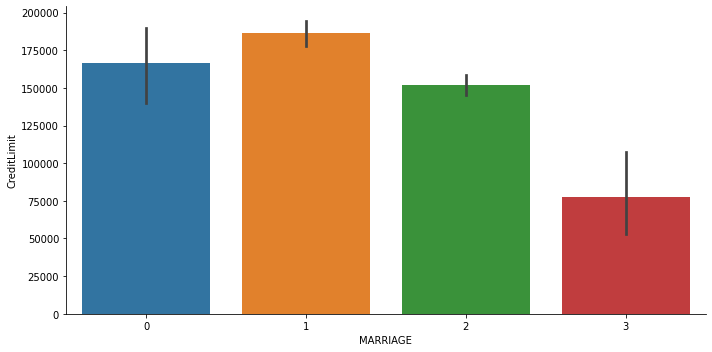

In [47]:
#factorplot of transactions amounts grouped by age range.
sns.catplot(x='MARRIAGE', y='CreditLimit', data=df_dum, kind='bar', 
             aspect=2)

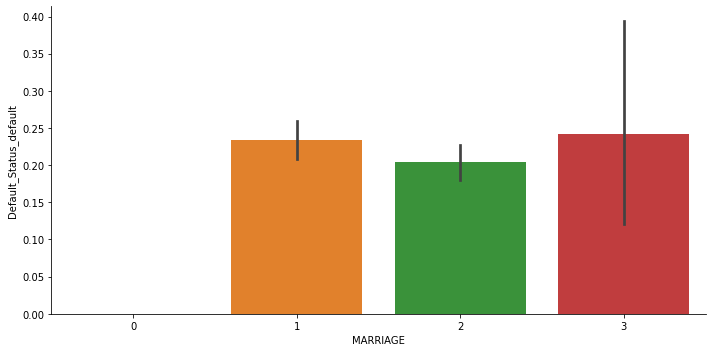

In [52]:
#factorplot of transactions amounts grouped by age range.
sns.catplot(x='MARRIAGE', y='Default_Status_default', data=df_dum, kind='bar', 
             aspect=2)

In [ ]:
#Plot showing the total value of transactions by online/in-store for each region
sns.catplot(x='TransactionType', y='AmountPerPurchase', data=data, kind='bar', col='RegionName', 
            col_order=['North','South','East','West'] )

# At what point do payments stop?

# What should be the cutoff for credit limit for males and females

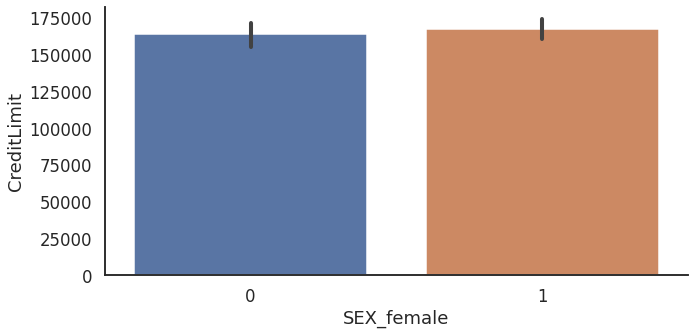

In [62]:
#factorplot of transactions amounts grouped by age range.
sns.catplot(x='SEX_female', y='CreditLimit', data=df_dum, kind='bar', 
             aspect=2)

# What should be the cutoff for credit limit for educational status

# What should be the cutoff for credit limit for age